In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punakha
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | porbandar
Processing Record 7 of Set 1 | gornozavodsk
Processing Record 8 of Set 1 | nishihara
Processing Record 9 of Set 1 | ketchikan
Processing Record 10 of Set 1 | leh
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | pacific grove
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | novaya zaimka
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | sorong
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | mangaratiba
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set

Processing Record 40 of Set 4 | forestville
Processing Record 41 of Set 4 | zhezkazgan
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | san esteban
Processing Record 44 of Set 4 | menongue
Processing Record 45 of Set 4 | tunduru
City not found. Skipping...
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | trinidad
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | chipinge
Processing Record 2 of Set 5 | bagdarin
Processing Record 3 of Set 5 | huilong
Processing Record 4 of Set 5 | chebenki
Processing Record 5 of Set 5 | bereda
Processing Record 6 of Set 5 | murgab
Processing Record 7 of Set 5 | khani
Processing Record 8 of Set 5 | anadyr
Processing Record 9 of Set 5 | bolshoye soldatskoye
City not found. Skipping...
Processing Record 10 of Set 5 | mareeba
Processing Record 11 of Set 5 | mount gambier
Processing Record 12 of Set 5 | 

Processing Record 32 of Set 8 | gravelbourg
Processing Record 33 of Set 8 | mazara del vallo
Processing Record 34 of Set 8 | port keats
Processing Record 35 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 8 | miranorte
City not found. Skipping...
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | bambous virieux
Processing Record 39 of Set 8 | pasighat
Processing Record 40 of Set 8 | igarka
Processing Record 41 of Set 8 | keti bandar
Processing Record 42 of Set 8 | herat
Processing Record 43 of Set 8 | genhe
Processing Record 44 of Set 8 | niquero
Processing Record 45 of Set 8 | iqaluit
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 | lompoc
Processing Record 48 of Set 8 | mumford
Processing Record 49 of Set 8 | sioux lookout
Processing Record 50 of Set 8 | kanigiri
Processing Record 1 of Set 9 | moroto
Processing Record 2 of Set 9 | vila franca do campo
Processing Record 3 of Set 9 | rock so

Processing Record 18 of Set 12 | chabahar
Processing Record 19 of Set 12 | paciran
Processing Record 20 of Set 12 | beira
Processing Record 21 of Set 12 | urengoy
Processing Record 22 of Set 12 | galesong
Processing Record 23 of Set 12 | bandarbeyla
Processing Record 24 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 25 of Set 12 | novyy yegorlyk
Processing Record 26 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 12 | coracora
Processing Record 28 of Set 12 | shahr-e babak
Processing Record 29 of Set 12 | pimenta bueno
Processing Record 30 of Set 12 | nantucket
Processing Record 31 of Set 12 | oranjemund
Processing Record 32 of Set 12 | pitimbu
Processing Record 33 of Set 12 | mitu
Processing Record 34 of Set 12 | zaysan
Processing Record 35 of Set 12 | asfi
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | norsup
Processing Record 38 of Set 12 | yumen
Processing Record 39 of Set 12 | eureka
Processing Record 

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punakha,27.5837,89.8598,70.72,93,100,1.34,BT,2022-07-09 21:23:10
1,Busselton,-33.6500,115.3333,56.73,56,95,19.01,AU,2022-07-09 21:23:10
2,Rikitea,-23.1203,-134.9692,74.71,78,59,13.94,PF,2022-07-09 21:23:11
3,Saint George,37.1041,-113.5841,107.64,10,0,10.36,US,2022-07-09 21:22:37
4,Punta Arenas,-53.1500,-70.9167,30.31,69,20,9.22,CL,2022-07-09 21:19:18
5,Porbandar,21.6422,69.6093,82.06,83,100,21.43,IN,2022-07-09 21:23:11
6,Gornozavodsk,58.3758,58.3211,63.23,85,41,1.59,RU,2022-07-09 21:23:11
7,Nishihara,26.1842,127.7558,83.86,89,20,11.50,JP,2022-07-09 21:23:11
8,Ketchikan,55.3422,-131.6461,57.67,94,100,8.05,US,2022-07-09 21:23:12
9,Leh,34.1667,77.5833,60.98,59,83,4.72,IN,2022-07-09 21:23:12


In [15]:
# reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punakha,BT,2022-07-09 21:23:10,27.5837,89.8598,70.72,93,100,1.34
1,Busselton,AU,2022-07-09 21:23:10,-33.6500,115.3333,56.73,56,95,19.01
2,Rikitea,PF,2022-07-09 21:23:11,-23.1203,-134.9692,74.71,78,59,13.94
3,Saint George,US,2022-07-09 21:22:37,37.1041,-113.5841,107.64,10,0,10.36
4,Punta Arenas,CL,2022-07-09 21:19:18,-53.1500,-70.9167,30.31,69,20,9.22
5,Porbandar,IN,2022-07-09 21:23:11,21.6422,69.6093,82.06,83,100,21.43
6,Gornozavodsk,RU,2022-07-09 21:23:11,58.3758,58.3211,63.23,85,41,1.59
7,Nishihara,JP,2022-07-09 21:23:11,26.1842,127.7558,83.86,89,20,11.50
8,Ketchikan,US,2022-07-09 21:23:12,55.3422,-131.6461,57.67,94,100,8.05
9,Leh,IN,2022-07-09 21:23:12,34.1667,77.5833,60.98,59,83,4.72


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
print(len(city_data_df))

573


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

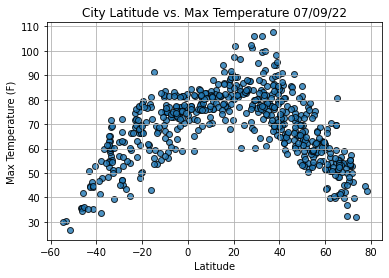

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

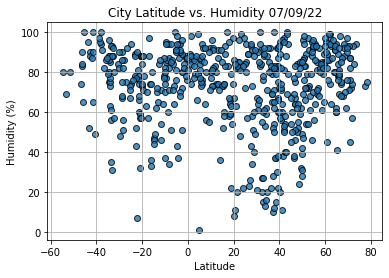

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

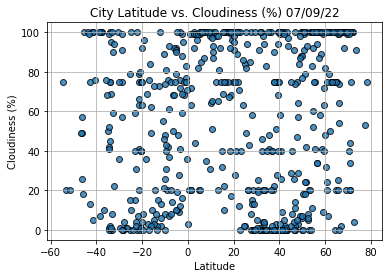

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

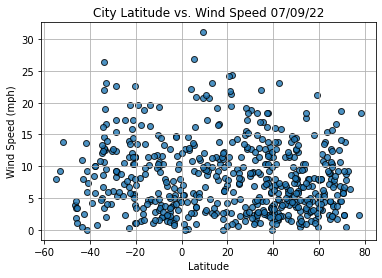

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punakha,BT,2022-07-09 21:23:10,27.5837,89.8598,70.72,93,100,1.34
3,Saint George,US,2022-07-09 21:22:37,37.1041,-113.5841,107.64,10,0,10.36
5,Porbandar,IN,2022-07-09 21:23:11,21.6422,69.6093,82.06,83,100,21.43
6,Gornozavodsk,RU,2022-07-09 21:23:11,58.3758,58.3211,63.23,85,41,1.59
7,Nishihara,JP,2022-07-09 21:23:11,26.1842,127.7558,83.86,89,20,11.50


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

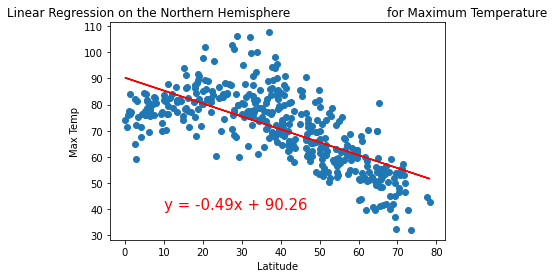

In [27]:
# Linear regression on the Northern Hemisphere - Note: coordinates are where the text will be located on the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

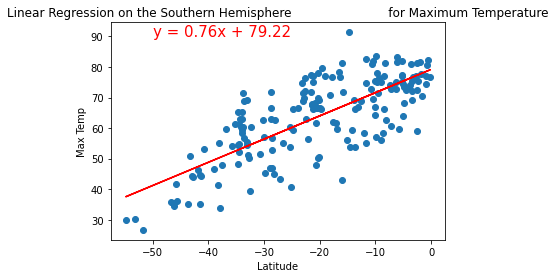

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

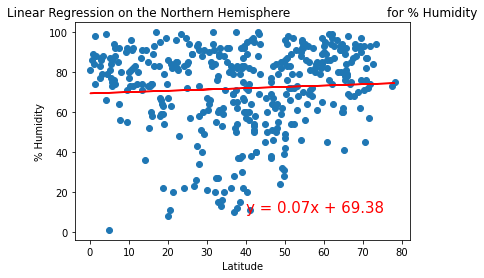

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

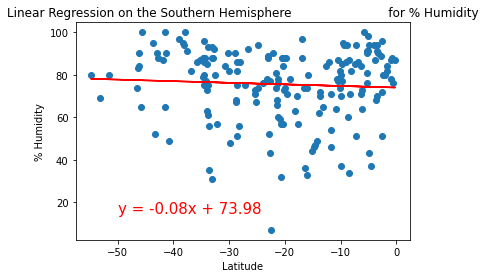

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

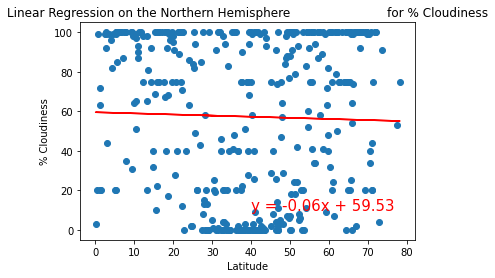

In [31]:
# Linear regression on the Northern Hemisphere - skill drill
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

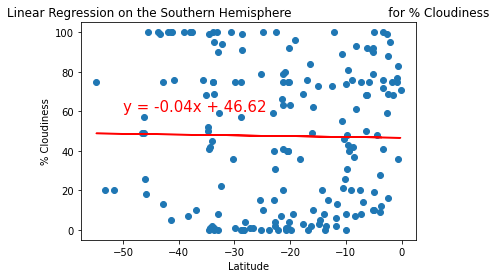

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

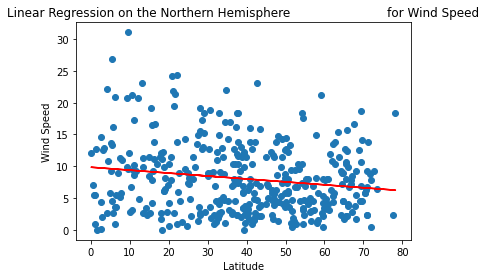

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

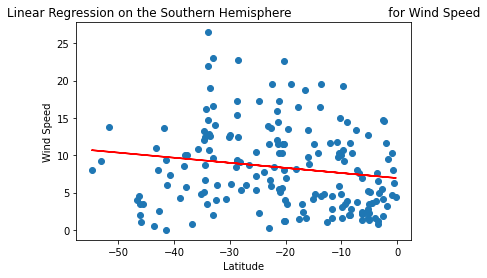

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))